<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/homeworks/h2/hw_02.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Tarea N°02

## Instrucciones

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__: Yosselinne Parra

* __Rol__: 201451576-6

2.- Debes _subir_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:
   - Soluciones
   - Código
   - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [5]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

***¿Cuánta memoria estoy utilizando?***

In [6]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int64
 1   c01     1797 non-null   int64
 2   c02     1797 non-null   int64
 3   c03     1797 non-null   int64
 4   c04     1797 non-null   int64
 5   c05     1797 non-null   int64
 6   c06     1797 non-null   int64
 7   c07     1797 non-null   int64
 8   c08     1797 non-null   int64
 9   c09     1797 non-null   int64
 10  c10     1797 non-null   int64
 11  c11     1797 non-null   int64
 12  c12     1797 non-null   int64
 13  c13     1797 non-null   int64
 14  c14     1797 non-null   int64
 15  c15     1797 non-null   int64
 16  c16     1797 non-null   int64
 17  c17     1797 non-null   int64
 18  c18     1797 non-null   int64
 19  c19     1797 non-null   int64
 20  c20     1797 non-null   int64
 21  c21     1797 non-null   int64
 22  c22     1797 non-null   int64
 23  c23     1797 

***¿Qué tipos de datos son?***

In [7]:
digits.dtypes.unique()

array([dtype('int64')], dtype=object)

***¿Existen datos NA?***

In [8]:
digits.isna().all().unique()

array([False])

***¿Hay registros que no se correspondan con tu conocimiento previo de los datos?***

In [9]:
digits.describe(include = 'all')

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


***¿Existen columnas repetidas y con fallas?***

In [10]:
digits.columns.unique()

Index(['c00', 'c01', 'c02', 'c03', 'c04', 'c05', 'c06', 'c07', 'c08', 'c09',
       'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19',
       'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28', 'c29',
       'c30', 'c31', 'c32', 'c33', 'c34', 'c35', 'c36', 'c37', 'c38', 'c39',
       'c40', 'c41', 'c42', 'c43', 'c44', 'c45', 'c46', 'c47', 'c48', 'c49',
       'c50', 'c51', 'c52', 'c53', 'c54', 'c55', 'c56', 'c57', 'c58', 'c59',
       'c60', 'c61', 'c62', 'c63', 'target'],
      dtype='object')

***¿Cuántas cantidades de clases diferentes hay  en la columna target?***

In [11]:
in_target=digits['target'].unique()
in_target

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

***Descripción detallada de cada una de las clases.***

In [12]:
targets_count = []

for i in range(len(np.unique(digits['target'].values))):
    print(f'clase {i}')
    print('Descripcion:')
    print(digits[digits['target']==i].describe())
    print('')
    targets_count.append(tuple([i,digits[digits['target']==i].shape[0]]))

print(f"Cantidad de datos asociados a cada clase: {targets_count}")

clase 0
Descripcion:
         c00         c01         c02         c03         c04         c05  \
count  178.0  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     0.0    0.022472    4.185393   13.095506   11.297753    2.926966   
std      0.0    0.211400    2.946684    2.246625    3.417485    3.232996   
min      0.0    0.000000    0.000000    5.000000    0.000000    0.000000   
25%      0.0    0.000000    2.000000   12.000000    9.000000    1.000000   
50%      0.0    0.000000    4.000000   13.000000   12.000000    2.000000   
75%      0.0    0.000000    6.000000   15.000000   14.000000    5.000000   
max      0.0    2.000000   12.000000   16.000000   16.000000   14.000000   

              c06    c07    c08         c09  ...    c55    c56         c57  \
count  178.000000  178.0  178.0  178.000000  ...  178.0  178.0  178.000000   
mean     0.033708    0.0    0.0    0.887640  ...    0.0    0.0    0.005618   
std      0.180985    0.0    0.0    1.778327  ...    0.0    0

***¿Cómo se distribuyen los datos por cada una de las clases?***

In [13]:
Clase0=digits[digits['target']==0]
Clase00=Clase0.drop(['target'], axis=1)

Clase1=digits[digits['target']==1]
Clase01= Clase1.drop(['target'], axis=1)
 
Clase2=digits[digits['target']==2]
Clase02= Clase2.drop(['target'], axis=1)
 
Clase3=digits[digits['target']==3]
Clase03= Clase3.drop(['target'], axis=1)
 
Clase4=digits[digits['target']==4]
Clase04= Clase4.drop(['target'], axis=1)
 
Clase5=digits[digits['target']==5]
Clase05= Clase5.drop(['target'], axis=1)
 
Clase6=digits[digits['target']==6]
Clase06= Clase6.drop(['target'], axis=1)
 
Clase7=digits[digits['target']==7]
Clase07= Clase7.drop(['target'], axis=1)
 
Clase8=digits[digits['target']==8]
Clase08= Clase8.drop(['target'], axis=1)
 
Clase9=digits[digits['target']==9]
Clase09= Clase9.drop(['target'], axis=1)

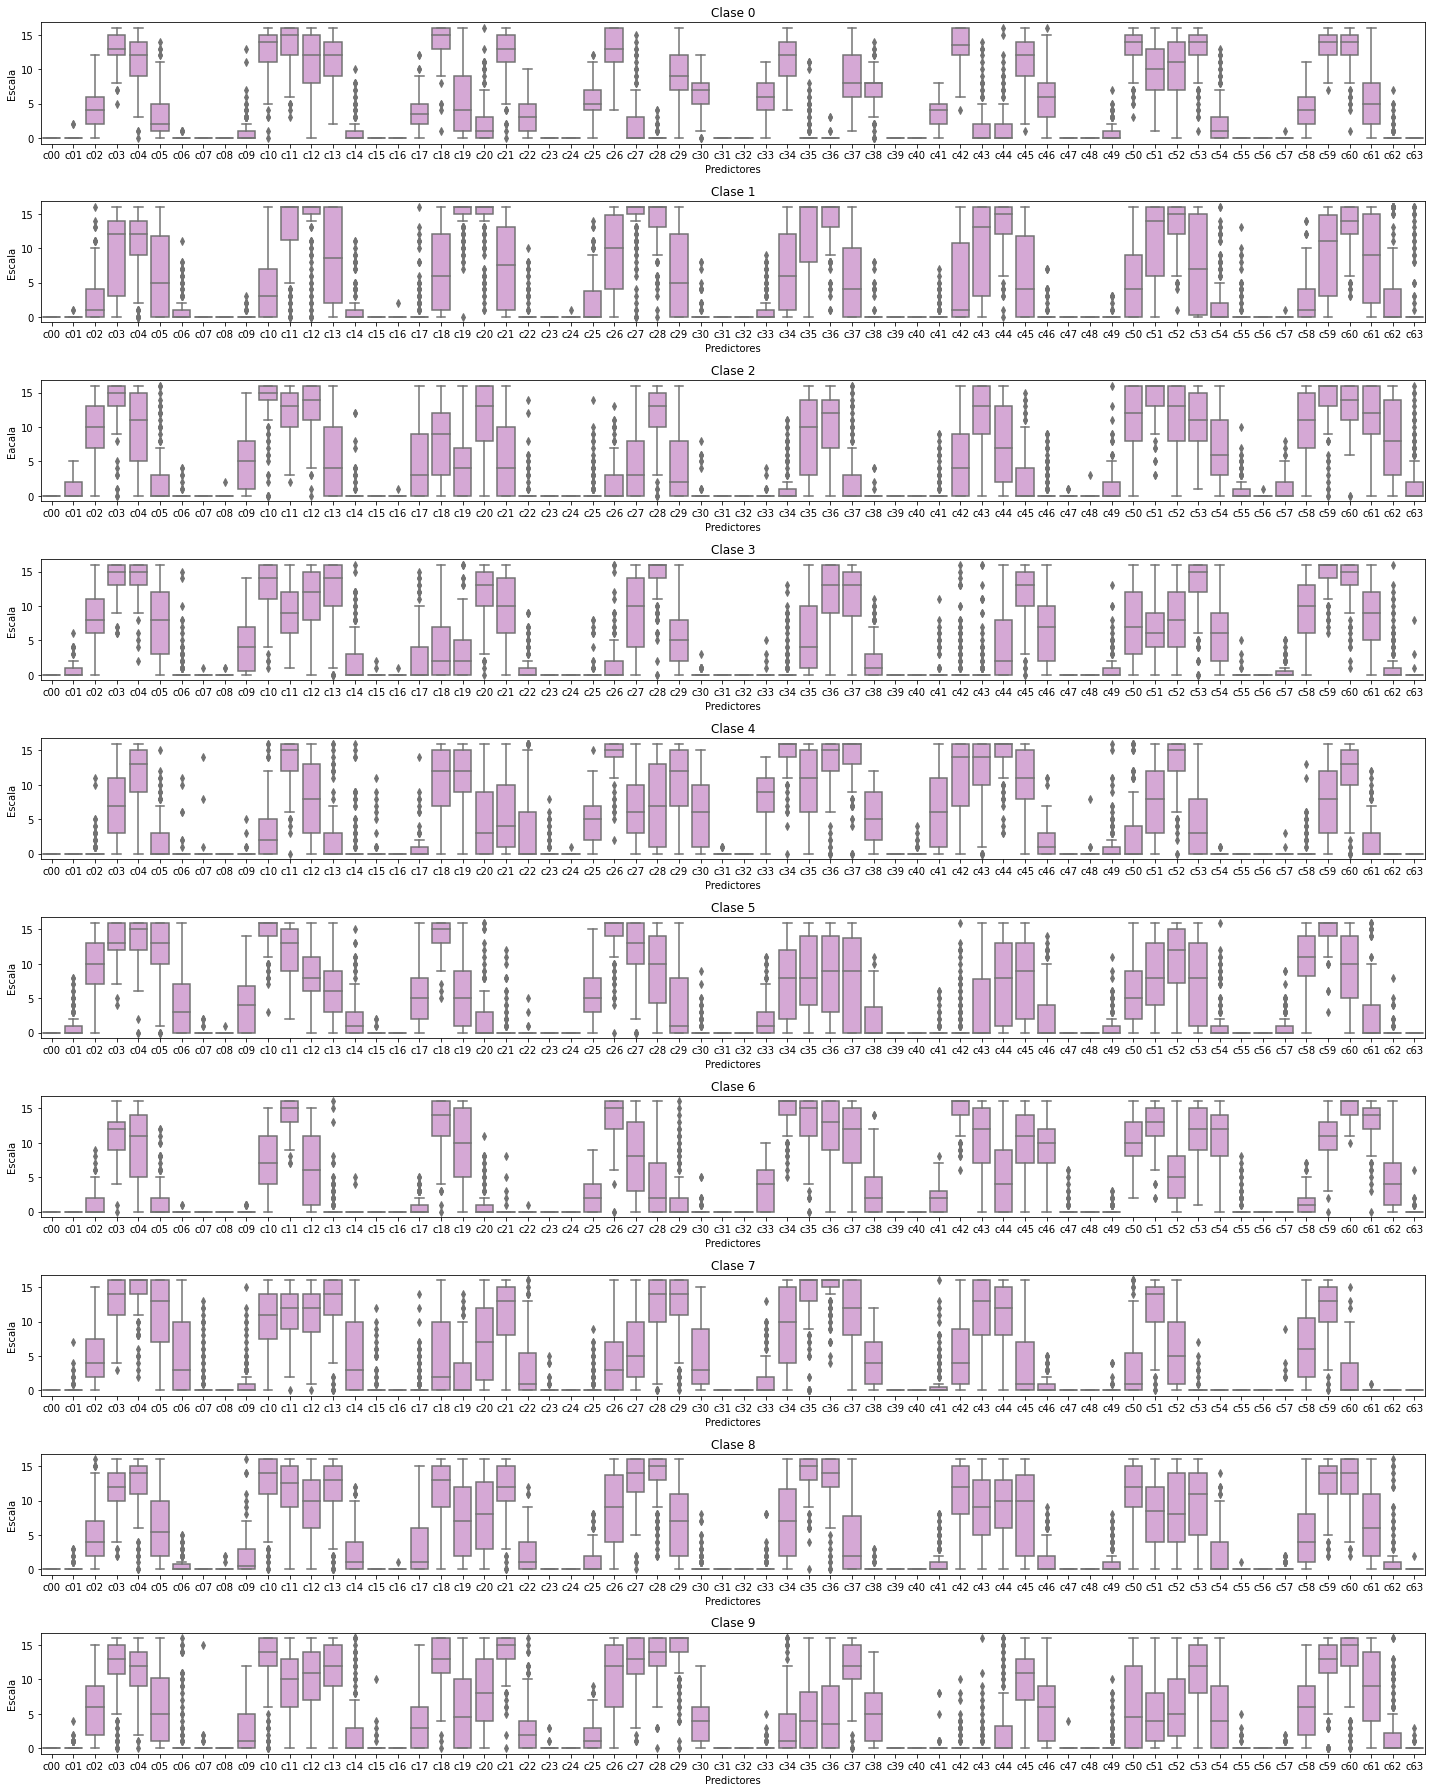

In [14]:
# datos
np.random.seed(0) # fijar semilla
predictores = ('c00', 'c01', 'c02', 'c03', 'c04', 'c05', 'c06', 'c07', 'c08', 'c09',
       'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19',
       'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28', 'c29',
       'c30', 'c31', 'c32', 'c33', 'c34', 'c35', 'c36', 'c37', 'c38', 'c39',
       'c40', 'c41', 'c42', 'c43', 'c44', 'c45', 'c46', 'c47', 'c48', 'c49',
       'c50', 'c51', 'c52', 'c53', 'c54', 'c55', 'c56', 'c57', 'c58', 'c59',
       'c60', 'c61', 'c62', 'c63')
y_pos = np.arange(len(predictores))
performance = 3 + 10 * np.random.rand(len(predictores))
error = np.random.rand(len(predictores))

# grafico General
fig = plt.figure(figsize=(20, 25)) # ventana

# grafico Clase 0
plt.subplot(10, 1, 1) # sub-ventana
sns.boxplot(data=Clase00, color='plum')
plt.title('Clase 0')
plt.xticks(y_pos, predictores)
plt.xlabel('Predictores')
plt.ylabel('Escala')

# grafico Clase 1
plt.subplot(10, 1, 2) # sub-ventana
sns.boxplot(data=Clase01, color='plum')
plt.title('Clase 1')
plt.xticks(y_pos, predictores)
plt.xlabel('Predictores')
plt.ylabel('Escala')

# grafico Clase 2
plt.subplot(10, 1, 3) # sub-ventana
sns.boxplot(data=Clase02, color='plum')
plt.title('Clase 2')
plt.xticks(y_pos, predictores)
plt.xlabel('Predictores')
plt.ylabel('Eacala')

# grafico Clase 3
plt.subplot(10, 1, 4) # sub-ventana
sns.boxplot(data=Clase03, color='plum')
plt.title('Clase 3')
plt.xticks(y_pos, predictores)
plt.xlabel('Predictores')
plt.ylabel('Escala')

# grafico Clase 4
plt.subplot(10, 1, 5) # sub-ventana
sns.boxplot(data=Clase04, color='plum')
plt.title('Clase 4')
plt.xticks(y_pos, predictores)
plt.xlabel('Predictores')
plt.ylabel('Escala')

# grafico Clase 5
plt.subplot(10, 1, 6) # sub-ventana
sns.boxplot(data=Clase05, color='plum')
plt.title('Clase 5')
plt.xticks(y_pos, predictores)
plt.xlabel('Predictores')
plt.ylabel('Escala')

# grafico Clase 6
plt.subplot(10, 1, 7) # sub-ventana
sns.boxplot(data=Clase06, color='plum')
plt.title('Clase 6')
plt.xticks(y_pos, predictores)
plt.xlabel('Predictores')
plt.ylabel('Escala')

# grafico Clase 7
plt.subplot(10, 1, 8) # sub-ventana
sns.boxplot(data=Clase07, color='plum')
plt.title('Clase 7')
plt.xticks(y_pos, predictores)
plt.xlabel('Predictores')
plt.ylabel('Escala')

# grafico Clase 8
plt.subplot(10, 1, 9) # sub-ventana
sns.boxplot(data=Clase08, color='plum')
plt.title('Clase 8')
plt.xticks(y_pos, predictores)
plt.xlabel('Predictores')
plt.ylabel('Escala')

# grafico Clase 9
plt.subplot(10, 1, 10) # sub-ventana
sns.boxplot(data=Clase09, color='plum')
plt.title('Clase 9')
plt.xticks(y_pos, predictores)
plt.xlabel('Predictores')
plt.ylabel('Escala')

fig.tight_layout()
plt.show()


***¿Cómo se distribuyen los datos por  predictor?***

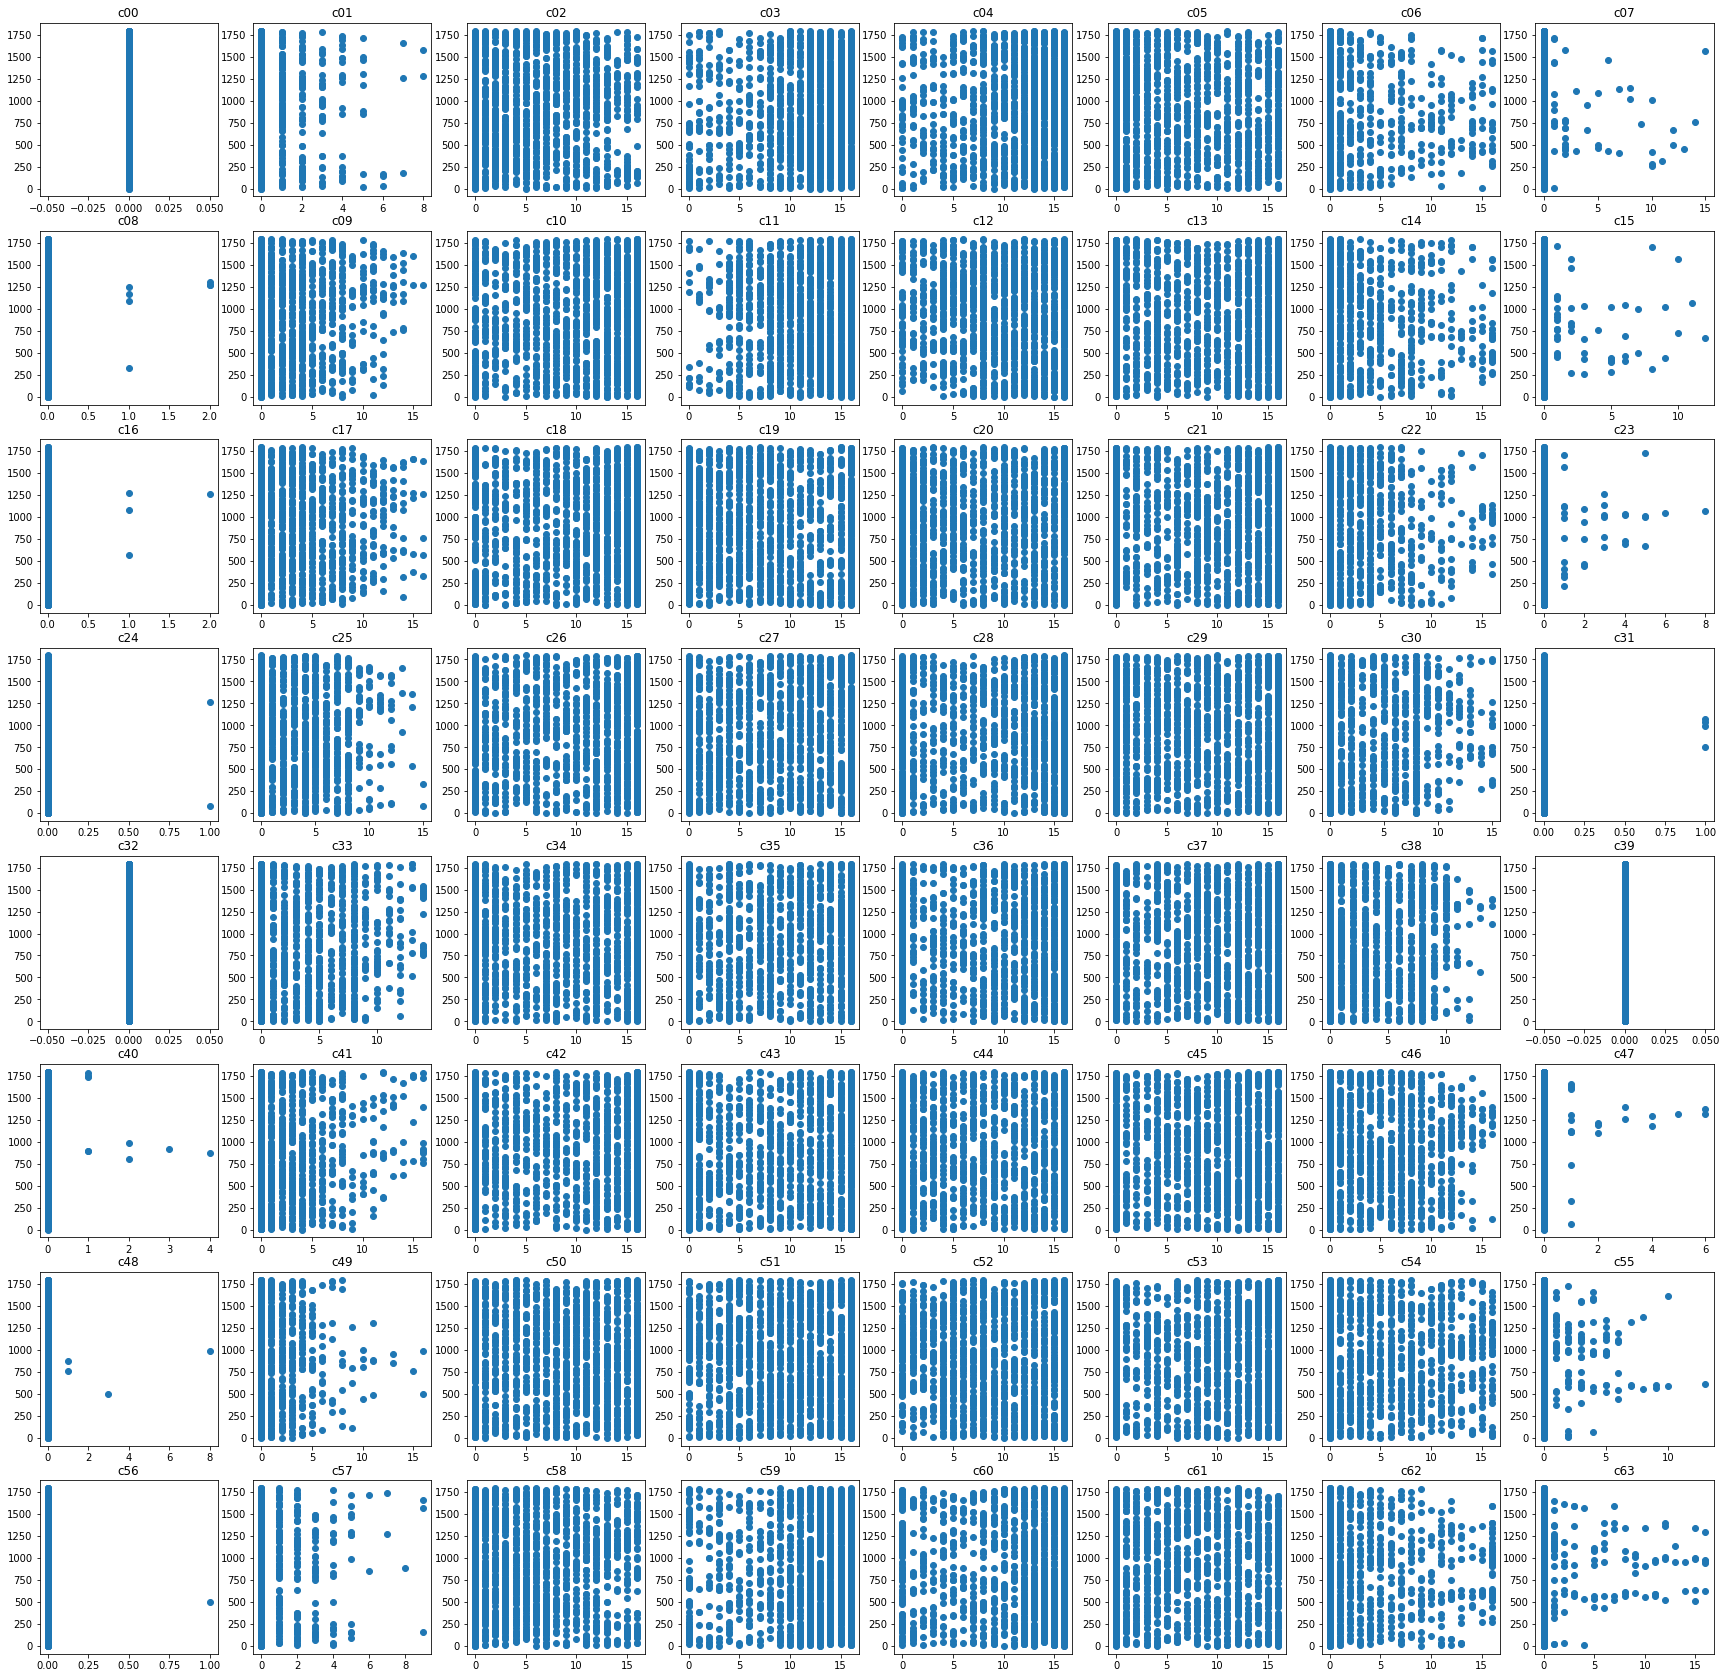

In [15]:
y = [i for i in range(len(digits))]
fig = plt.figure(figsize = (30,30))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.scatter(digits[digits.columns[i]],y)
    plt.title(digits.columns[i])

***¿Cuántos registros por clase hay?***

In [16]:
registros = dict()
sum_aux=0
for column in Clase00:
  aux=Clase00[column].sum()
  sum_aux=sum_aux + aux
  registros['Clase 0']=sum_aux
sum_aux=0
for column in Clase01:
  aux=Clase01[column].sum()
  sum_aux=sum_aux + aux
  registros['Clase 1']=sum_aux
sum_aux=0
for column in Clase02:
  aux=Clase02[column].sum()
  sum_aux=sum_aux + aux
  registros['Clase 2']=sum_aux 
sum_aux=0
for column in Clase03:
  aux=Clase03[column].sum()
  sum_aux=sum_aux + aux
  registros['Clase 3']=sum_aux
sum_aux=0
for column in Clase04:
  aux=Clase04[column].sum()
  sum_aux=sum_aux + aux
  registros['Clase 4']=sum_aux
sum_aux=0
for column in Clase05:
  aux=Clase05[column].sum()
  sum_aux=sum_aux + aux
  registros['Clase 5']=sum_aux
sum_aux=0
for column in Clase06:
  aux=Clase06[column].sum()
  sum_aux=sum_aux + aux
  registros['Clase 6']=sum_aux
sum_aux=0
for column in Clase07:
  aux=Clase07[column].sum()
  sum_aux=sum_aux + aux
  registros['Clase 7']=sum_aux
sum_aux=0
for column in Clase08:
  aux=Clase08[column].sum()
  sum_aux=sum_aux + aux
  registros['Clase 8']=sum_aux
sum_aux=0
for column in Clase09:
  aux=Clase09[column].sum()
  sum_aux=sum_aux + aux
  registros['Clase 9']=sum_aux
registros

{'Clase 0': 56415,
 'Clase 1': 57007,
 'Clase 2': 55566,
 'Clase 3': 56151,
 'Clase 4': 56239,
 'Clase 5': 55915,
 'Clase 6': 56336,
 'Clase 7': 54289,
 'Clase 8': 57408,
 'Clase 9': 56392}

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [17]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

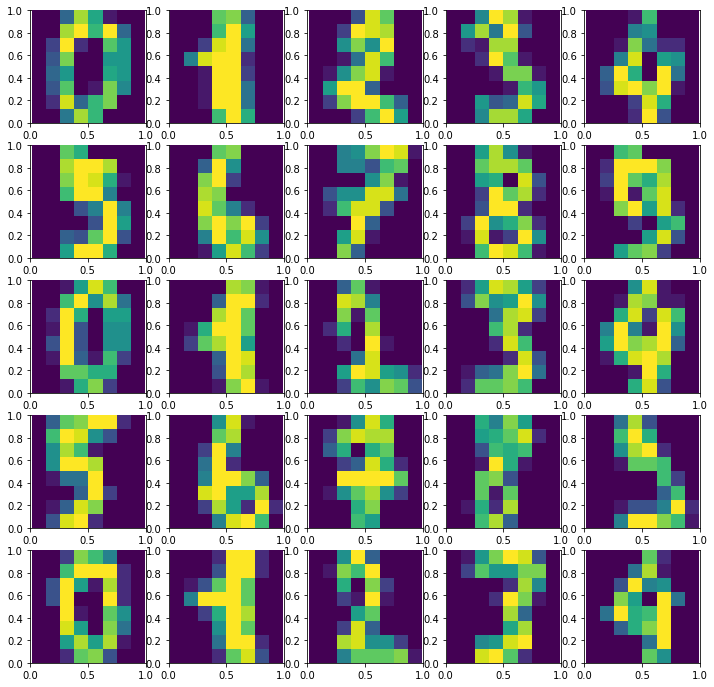

In [18]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
for i in range(1, nx*ny+1):
    img = digits_dict['images'][i-1]
    fig.add_subplot(nx, ny, i)
    plt.imshow(img)
    plt.axis('off')
plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [19]:
X = digits.drop(columns="target").values
y = digits["target"].values

***train-test***

In [20]:
from metrics_regression import summary_metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)
print('número de filas data original : ',len(X))
print('número de filas train set     : ',len(X_train))
print('número de filas test set      : ',len(X_test))

número de filas data original :  1797
número de filas train set     :  1347
número de filas test set      :  450


***Modelos***

In [21]:
from sklearn.metrics import confusion_matrix

***Regresión Logística:***

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import time

#Selección de hiperparámetros
h_parametros_rlog= {
          'fit_intercept':[True],
          'penalty' : ['l1', 'l2'],
          'C' : [20, 10 , 1, 0.1, 0.01],
          'class_weight' : ['balanced', None],
          'solver' : ['liblinear'],
          }

rlog = LogisticRegression()
rlog_grid = GridSearchCV(estimator = rlog, param_grid = h_parametros_rlog, cv = 10)
start = time.time()
rlog_grid_result = rlog_grid.fit(X_train, y_train)
print("segundos:",(time.time() - start))

segundos: 67.45520830154419


In [24]:
rlog_grid_result.best_score_

0.9636318407960198

In [25]:
rlog_grid_result.best_params_

{'C': 0.1,
 'class_weight': 'balanced',
 'fit_intercept': True,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [26]:
y_pred = rlog_grid.predict(X_test)
summary_metrics(pd.DataFrame(data={'y':y_test, 'yhat':y_pred}))

,mae,mse,rmse,mape,maape,wmape,mmape,smape
0,0.1422,0.7333,0.8563,inf,inf,0.0317,0.043,inf


In [27]:
pd.DataFrame(data=confusion_matrix(y_test,y_pred))

,0,1,2,3,4,5,6,7,8,9
0,40,0,0,0,1,0,0,0,0,0
1,0,45,0,0,0,0,0,0,1,1
2,0,0,50,0,0,0,0,0,0,0
3,0,0,0,38,0,1,0,0,1,0
4,0,0,0,0,49,0,0,1,0,3
5,0,0,0,0,0,47,0,0,0,1
6,0,0,0,0,0,1,36,0,0,0
7,0,0,0,0,0,0,0,39,1,1
8,0,1,0,0,1,0,0,1,44,0
9,0,0,0,0,0,0,0,0,0,46


***K-nearest neighbour*** 

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from metrics_classification import summary_metrics

import time
h_parametros_kn={
          'n_neighbors' : [30, 25, 1, 9],
          'weights' : ['uniform', 'distance'],
          'metric' : ['euclidean', 'manhattan'],
          'algorithm' : ['auto','ball_tree', 'kd_tree']
          }
kn= KNeighborsClassifier()
kn_grid = GridSearchCV(estimator =kn, param_grid = h_parametros_kn, cv = 10)
start = time.time()
kn_grid_result = kn_grid.fit(X_train, y_train)
print("segundos",(time.time() - start))

segundos 10.666589498519897


In [33]:
kn_grid_result.best_score_

0.9873742399115534

In [34]:
kn_grid_result.best_params_

{'algorithm': 'auto',
 'metric': 'euclidean',
 'n_neighbors': 1,
 'weights': 'uniform'}

In [39]:
y_pred = kn_grid.predict(X_test)
summary_metrics(pd.DataFrame(data={'y':y_test, 'yhat':y_pred}))

,accuracy,recall,precision,fscore
0,0.9933,0.9935,0.9934,0.9933


In [40]:
pd.DataFrame(data=confusion_matrix(y_test,y_pred))

,0,1,2,3,4,5,6,7,8,9
0,41,0,0,0,0,0,0,0,0,0
1,0,47,0,0,0,0,0,0,0,0
2,0,0,49,1,0,0,0,0,0,0
3,0,0,0,40,0,0,0,0,0,0
4,0,0,0,0,53,0,0,0,0,0
5,0,0,0,0,0,47,0,0,0,1
6,0,0,0,0,0,0,37,0,0,0
7,0,0,0,0,0,0,0,40,0,1
8,0,0,0,0,0,0,0,0,47,0
9,0,0,0,0,0,0,0,0,0,46


***Linear Discriminant Analysis***

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
import time

lda = LinearDiscriminantAnalysis(solver='svd', )#Calculamos el LDA con la matriz SVD
h_parametros_lda = {
    'n_components': (0,1,9),
    'store_covariance' :(True, False),
                   }
# Usando GridSearch obtenermos el mejor estimador posible
lda_grid = GridSearchCV(
    estimator = lda,
    param_grid = h_parametros_lda,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

start = time.time()
lda_grid_result = lda_grid.fit(X_train, y_train)
print("segundos",(time.time() - start))

segundos 1.9763200283050537


In [42]:
lda_grid_result.best_score_

0.9487759878837945

In [43]:
lda_grid_result.best_params_

{'n_components': 0, 'store_covariance': True}

In [44]:
y_pred = lda_grid.predict(X_test)
summary_metrics(pd.DataFrame(data={'y':y_test, 'yhat':y_pred}))

,accuracy,recall,precision,fscore
0,0.9578,0.9582,0.9608,0.9586


In [45]:
pd.DataFrame(data=confusion_matrix(y_test,y_pred))

,0,1,2,3,4,5,6,7,8,9
0,40,0,0,0,0,0,1,0,0,0
1,0,45,0,0,0,0,0,0,0,2
2,0,0,50,0,0,0,0,0,0,0
3,0,0,0,37,0,1,0,0,2,0
4,0,0,0,0,48,0,0,2,2,1
5,0,0,0,0,0,47,0,0,0,1
6,0,0,0,0,0,0,36,0,0,1
7,0,0,0,0,0,0,0,39,0,2
8,0,2,0,0,0,0,0,0,44,1
9,0,0,0,0,0,0,0,0,1,45


### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

***Cross validation***

In [47]:
from sklearn.model_selection import cross_val_score
precision = cross_val_score(estimator=kn_grid,
                            X=X_train,
                            y=y_train,
                            cv=10)
precision = [round(x,4) for x in precision]
print('Precisiones: {} '.format(precision))
Promedio=np.mean(precision)
desviación=np.std(precision)
print('Promedio:',Promedio)
print('Desviación estandar:',desviación)

Precisiones: [0.9926, 1.0, 0.963, 0.9926, 0.9778, 0.9926, 1.0, 0.9851, 0.9851, 0.9851] 
Promedio: 0.9873899999999999
Desviación estandar 0.01049775690326273


***Curva de Validación:***

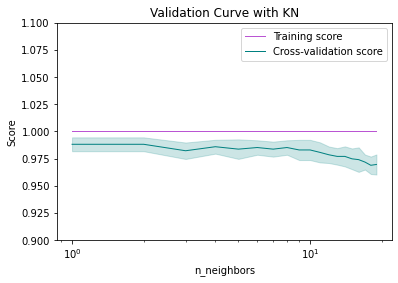

In [48]:
from sklearn.model_selection import validation_curve
rango = np.arange(1,20,1)

# Usamos los mejores hiperparametros 
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(
        weights = 'distance',
        metric = 'euclidean'),
        X_train,
        y_train,
        param_name="n_neighbors",
        param_range=rango,
        scoring="accuracy",
        n_jobs=1
        )
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

plt.title("Validation Curve with KN")
plt.xlabel("n_neighbors")
plt.ylabel("Score")
plt.ylim(0.9, 1.1)
lw = 1
plt.semilogx(rango,
             train_scores_mean,
             label="Training score",
             color="mediumorchid",
             lw=lw)
plt.fill_between(rango, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,color="mediumorchid", lw=lw)
plt.semilogx(rango,
             test_scores_mean, 
             label="Cross-validation score",
             color="teal",
             lw=lw)
plt.fill_between(rango, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,color="teal", lw=lw)
plt.legend(loc="best")

plt.show()


***Curva AUC-ROC:***



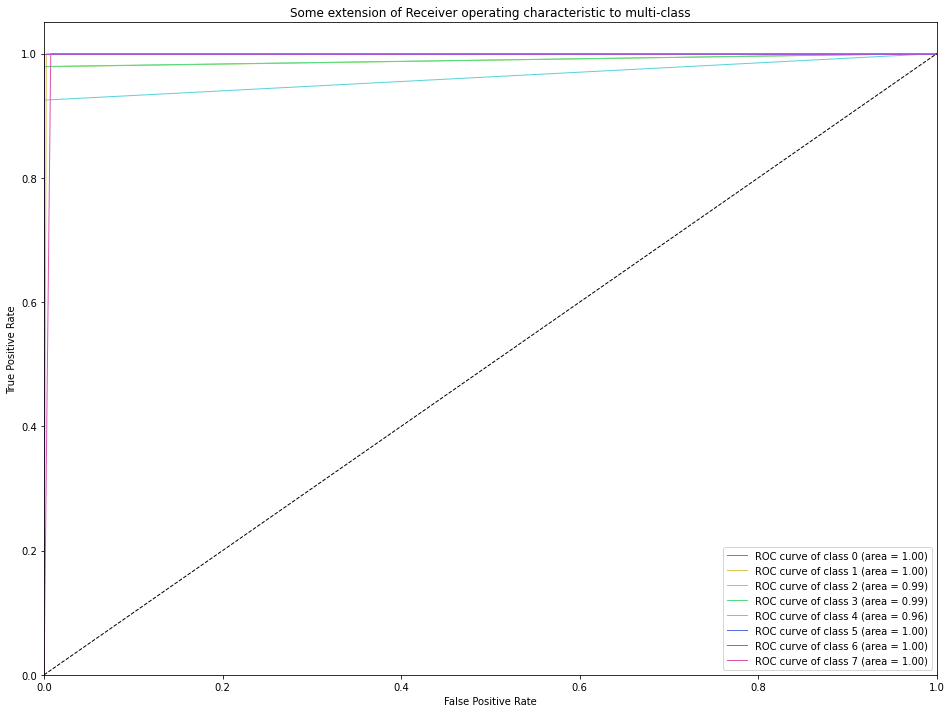

In [49]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from numpy import interp
from sklearn.metrics import roc_auc_score

y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
clases = y.shape[1]
samples, features = X.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
classifier = KNeighborsClassifier(algorithm='auto', metric='euclidean', n_neighbors=3, weights='distance')
y_score = classifier.fit(X_train, y_train).predict(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(clases):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro-average"], tpr["micro-average"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro-average"] = auc(fpr["micro-average"], tpr["micro-average"])

import sys
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(clases)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(clases):
    mean_tpr = mean_tpr + interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= clases

fpr["macro-average"] = all_fpr
tpr["macro-average"] = mean_tpr
roc_auc["macro-average"] = auc(fpr["macro-average"], tpr["macro-average"])

plt.rcParams["figure.figsize"] = (16,12)
colors = sns.color_palette("hls", 8)
for i, color in zip(range(clases), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una redcción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


In [50]:
digits_pca=pd.DataFrame(digits.drop(columns="target"))

In [51]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
digits_pca.mean(axis=0)

----------------------
Media de cada variable
----------------------


c00     0.000000
c01     0.303840
c02     5.204786
c03    11.835838
c04    11.848080
         ...    
c59    12.089037
c60    11.809126
c61     6.764051
c62     2.067891
c63     0.364496
Length: 64, dtype: float64

In [52]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
digits_pca.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


c00     0.000000
c01     0.822997
c02    22.608374
c03    18.052657
c04    18.381696
         ...    
c59    19.137948
c60    24.343836
c61    34.817348
c62    16.732582
c63     3.460053
Length: 64, dtype: float64

In [53]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(digits_pca)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [54]:
data = modelo_pca.components_
data.shape

(64, 64)

In [55]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = digits_pca.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10',
               'PC11', 'PC12', 'PC13', 'PC14','PC15','PC16','PC17','PC18','PC19','PC20',
               'PC21', 'PC22', 'PC23', 'PC24','PC25','PC26','PC27','PC28','PC29','PC30',
               'PC31', 'PC32', 'PC33', 'PC34','PC35','PC36','PC37','PC38','PC39','PC40',
               'PC41', 'PC42', 'PC43', 'PC44','PC45','PC46','PC47','PC48','PC49','PC50',
               'PC51', 'PC52', 'PC53', 'PC54','PC55','PC56','PC57','PC58','PC59','PC60',
               'PC61','PC62','PC63','PC64']
)

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c54,c55,c56,c57,c58,c59,c60,c61,c62,c63
PC1,1.214827e-18,-1.822339e-01,-2.858680e-01,-2.203697e-01,2.516956e-02,9.497250e-03,5.247650e-02,6.269499e-02,-3.470727e-02,-2.455337e-01,...,-1.212471e-01,-4.877119e-02,1.835859e-03,-1.603957e-01,-2.798530e-01,-1.944493e-01,-1.777381e-02,-1.031980e-01,-1.198106e-01,-7.149362e-02
PC2,-7.624335e-19,4.702701e-02,5.956480e-02,-2.080385e-02,1.559032e-01,2.741330e-01,2.497325e-01,1.458321e-01,-1.027208e-03,2.761909e-02,...,-2.577515e-01,-1.150021e-01,4.882514e-03,4.449786e-02,8.139985e-02,-9.904904e-03,-2.519339e-01,-2.426178e-01,-1.650893e-01,-7.132924e-02
PC3,-3.568802e-18,2.358821e-02,-5.679875e-02,-4.046383e-02,-6.706530e-02,-9.108975e-02,-3.757846e-02,-2.254605e-02,2.812648e-03,-5.064228e-02,...,-2.317940e-02,1.029926e-01,1.154743e-02,3.389505e-02,-5.127284e-02,-8.346395e-02,-6.245529e-02,-2.227952e-02,1.003656e-01,9.244589e-02
PC4,2.384224e-18,1.781531e-01,1.561285e-01,1.677999e-01,-8.908546e-06,-5.191940e-04,4.369941e-02,8.749052e-03,1.440147e-02,1.240416e-01,...,-1.574399e-01,-1.303463e-01,7.788463e-03,1.864178e-01,1.654876e-01,1.714895e-01,-1.544375e-01,-2.524324e-01,-1.607203e-01,-1.181805e-01
PC5,-4.198298e-19,-2.997819e-02,-1.466570e-02,4.371583e-02,-1.399930e-01,7.988361e-03,2.112215e-01,2.818177e-01,-6.307164e-04,6.787675e-03,...,1.924482e-01,2.489619e-01,-5.123841e-02,-3.918230e-02,-3.345385e-02,1.003746e-01,-3.774456e-03,9.473785e-02,2.440255e-01,2.317047e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PC60,-6.766915e-19,-2.286723e-02,1.392809e-01,1.543367e-02,-1.314418e-02,7.458465e-02,-2.274852e-03,-1.519113e-03,-8.288342e-03,1.723865e-02,...,-7.258228e-02,1.292363e-02,4.755654e-03,3.514279e-03,-7.634566e-02,-1.106234e-01,1.431153e-01,-2.897358e-01,1.657914e-01,-5.978840e-02
PC61,-2.545698e-18,-2.635437e-02,6.864465e-01,-1.818844e-02,5.628714e-02,-1.702566e-03,5.392186e-03,6.467758e-03,-2.391945e-03,6.344924e-02,...,-2.690800e-02,-1.350493e-02,1.120620e-02,-4.592615e-03,-6.568072e-01,4.297168e-02,-8.656064e-02,-2.063807e-02,4.663905e-02,-2.344770e-02
PC62,0.000000e+00,1.915221e-18,3.130147e-16,-1.702834e-16,5.058138e-17,-2.329491e-16,-1.196502e-16,5.382254e-17,-2.598259e-16,1.773047e-16,...,8.673617e-18,-5.551115e-17,-1.942890e-16,-1.734723e-16,4.857226e-17,2.081668e-16,1.526557e-16,-3.469447e-17,3.122502e-17,-8.326673e-17
PC63,-0.000000e+00,-3.740169e-17,-7.458971e-17,4.992225e-17,1.325414e-16,-1.406086e-17,-1.009843e-16,7.446352e-18,-1.677315e-16,-1.969904e-17,...,-2.149431e-17,5.833008e-17,-1.277190e-16,1.180154e-16,-6.994459e-17,-1.968911e-16,-7.578573e-17,1.496199e-17,-1.595675e-16,1.055471e-16


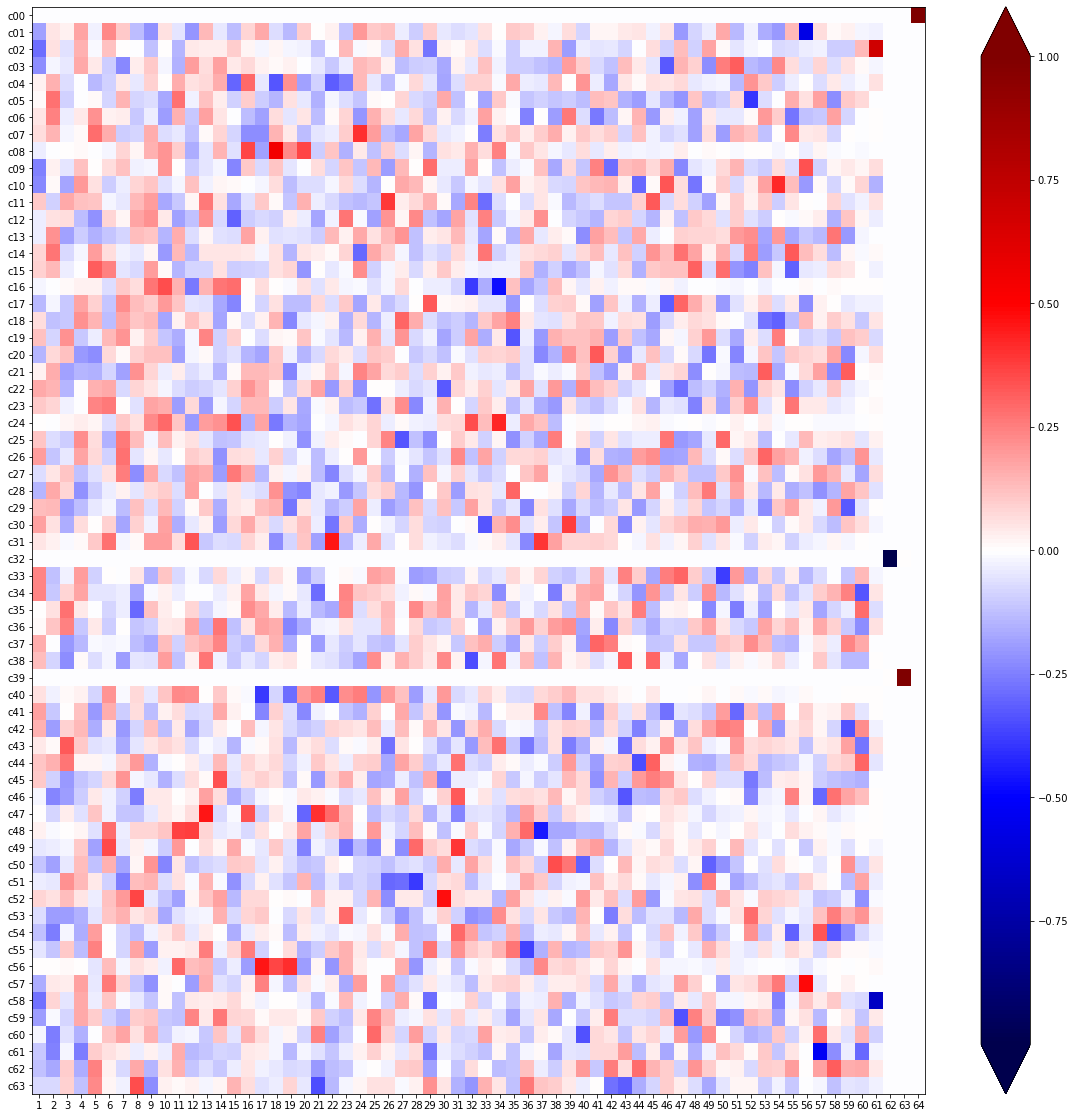

In [56]:
plt.figure(figsize=(20,20))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='seismic', aspect='auto')
plt.yticks(range(len(digits_pca.columns)), digits_pca.columns)
plt.xticks(range(len(digits_pca.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar(extend='both');

In [57]:
X = pd.DataFrame(digits.drop(columns="target").drop(['c00','c32','c39'], axis=1) )
y = digits["target"]

In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

k = 30  # número de atributos a seleccionar
columnas = list(X.columns.values)
selected_predictors = SelectKBest(f_classif, k=k).fit(X, y)
support_predictors = selected_predictors.get_support()
atributes = [columnas[i] for i in list(support_predictors.nonzero()[0])]
print(atributes)

['c02', 'c05', 'c10', 'c13', 'c18', 'c19', 'c20', 'c21', 'c26', 'c27', 'c28', 'c29', 'c30', 'c33', 'c34', 'c35', 'c36', 'c37', 'c38', 'c41', 'c42', 'c43', 'c44', 'c46', 'c50', 'c53', 'c54', 'c58', 'c60', 'c61']


In [59]:
# ajustar modelo utilizando PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
pca = PCA(n_components=30)
principalComponents = pca.fit_transform(X)
selected_predictors = SelectKBest(f_classif, k=k).fit(X, y)

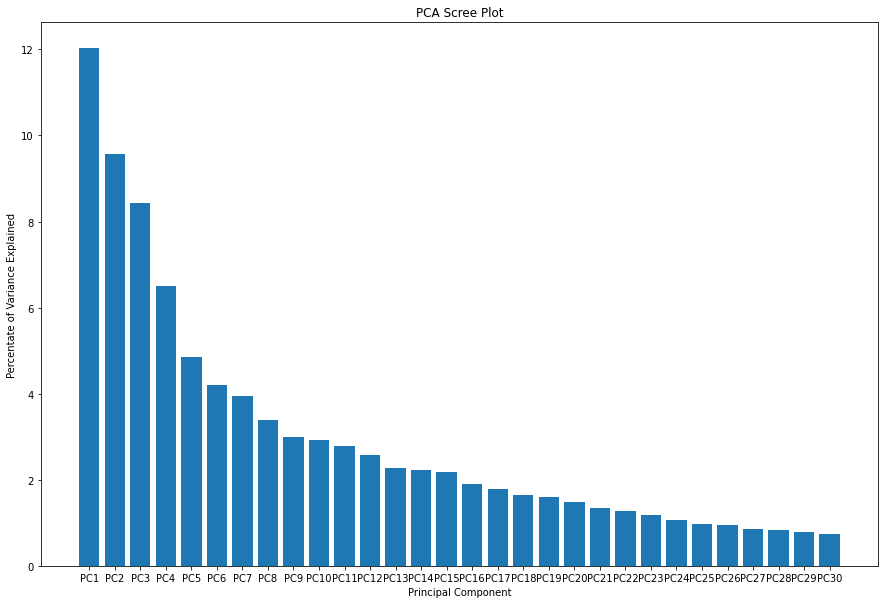

In [60]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns=[]
for i in range(1, 31):
    if i == 1:
        columns.append(f'PC{i}')
    else:
        columns.append(f'PC{i}')
    columns

plt.figure(figsize=(15,10))
plt.bar(x= range(1,31), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

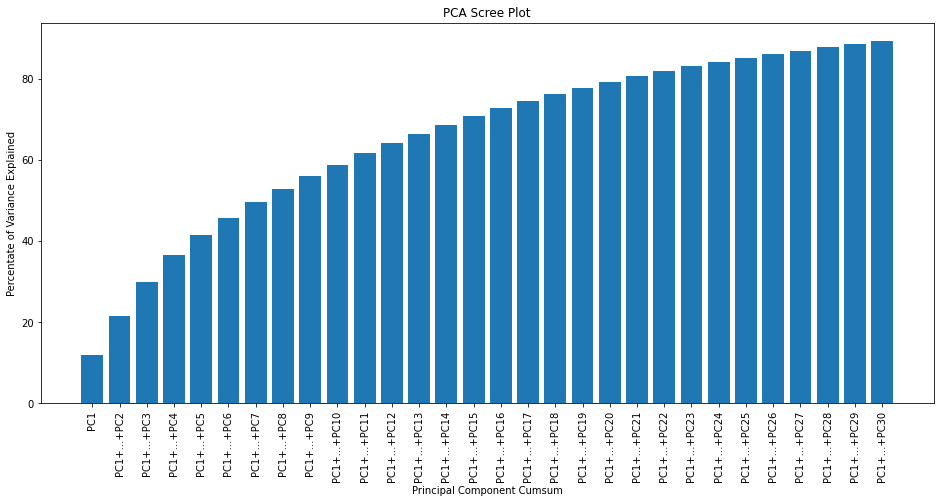

In [61]:
percent_variance_cum = np.cumsum(percent_variance)
columns = []
for i in range(1, 31):
    if i == 1:
        columns.append(f'PC{i}')
    else:
        columns.append(columns[0] + f'+...+PC{i}')
columns

plt.figure(figsize=(16,7))
plt.bar(x= range(1,31), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xticks(x= range(1,31), rotation='vertical')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

In [63]:
X_k = pd.DataFrame(X,columns=columnas)[atributes]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_k, y, test_size=0.25, random_state=2)

precision = cross_val_score(estimator=kn_grid,X=X_train2,y=y_train2,cv=10)

precision = [round(x,4) for x in precision]
print('Precisiones: {} '.format(precision))
Promedio=np.mean(precision)
desviación=np.std(precision)
print('Promedio:',Promedio)
print('Desviación estandar:',desviación)

Precisiones: [0.9704, 0.9778, 0.9926, 0.9778, 0.9926, 0.9778, 0.9704, 0.9851, 0.9925, 1.0] 
Promedio: 0.9837
Desviación estandar: 0.00980673238137964


In [64]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(principalComponents, y, test_size=0.25, random_state=2)

classifier = KNeighborsClassifier(weights = 'distance',metric = 'euclidean', n_neighbors = 3)

precision = cross_val_score(estimator=kn_grid,X=X_train3,y=y_train3,cv=10)

precision = [round(x,4) for x in precision]
Promedio=np.mean(precision)
desviación=np.std(precision)
print('Promedio:',Promedio)
print('Desviación estandar:',desviación)

Promedio: 0.97403
Desviación estandar: 0.008915722068346465


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import time
#Método K-Nearest Neighbours Seleccionando atributos

#Selección de hiperparámetros
h_parametros_kn={
          'n_neighbors' : [30, 25, 1, 9],
          'weights' : ['uniform', 'distance'],
          'metric' : ['euclidean', 'manhattan'],
          'algorithm' : ['auto','ball_tree', 'kd_tree']
          }
kn= KNeighborsClassifier()
kn_grid = GridSearchCV(estimator =kn, param_grid = h_parametros_kn, cv = 10)
start = time.time()

knn_grid_result = kn_grid.fit(X_train2, y_train2)

print('KNN with GridSearch and atributes')
print("segundos:",(time.time() - start))

#Método K-Nearest Neighbours extrayendo atributos y usando PCA

start = time.time()

knn_grid_result_2 = kn_grid.fit(X_train3, y_train3)

print('')
print('KNN with PCA')
print("segundos", (time.time() - start))

KNN with GridSearch and atributes
segundos: 7.533879995346069

KNN with PCA
segundos 6.76423978805542


### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [ ]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 
    model.fit(X_train, Y_train) # ajustando el modelo
    y_pred = list(model.predict(X_test))

    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = (y_pred == Y_test)
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = (y_pred != Y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test[mask]
    y_aux_true = Y_test[mask]
    y_aux_pred = np.array(y_pred)[mask]
    
    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    fix = X_aux.shape[0]
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i
            if index < fix:
                data  = X_aux[index, :].reshape(8,8)
                label_pred = str(int(y_aux_pred[index]))
                label_true = str(int(y_aux_true[index]))
                ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
                ax[i][j].text(0, 0, label_pred,
                              horizontalalignment='center',
                              verticalalignment='center',
                              fontsize=10,
                              color=color)
                ax[i][j].text(7, 0, label_true,
                              horizontalalignment='center',
                              verticalalignment='center',
                              fontsize=10,
                              color='blue')
                ax[i][j].get_xaxis().set_visible(False)
                ax[i][j].get_yaxis().set_visible(False)
    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

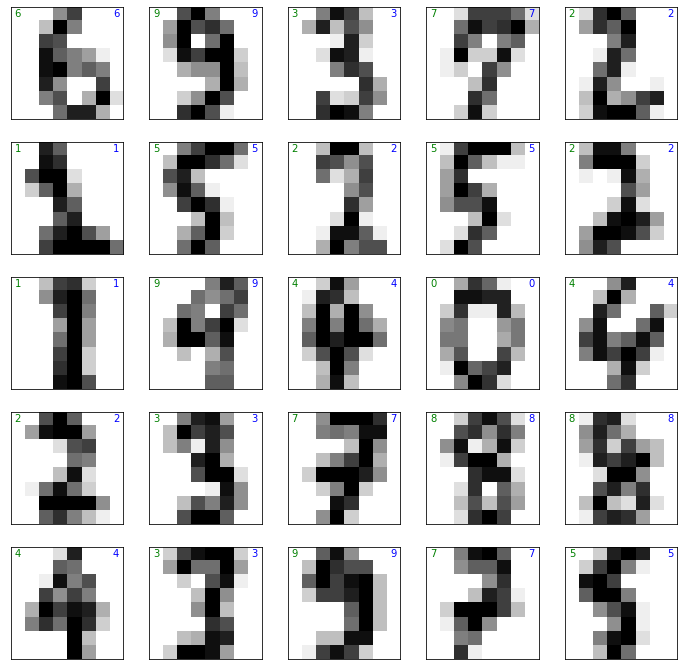

In [ ]:
mostar_resultados(digits,KNeighborsClassifier(),nx=5, ny=5,label = "correctos")

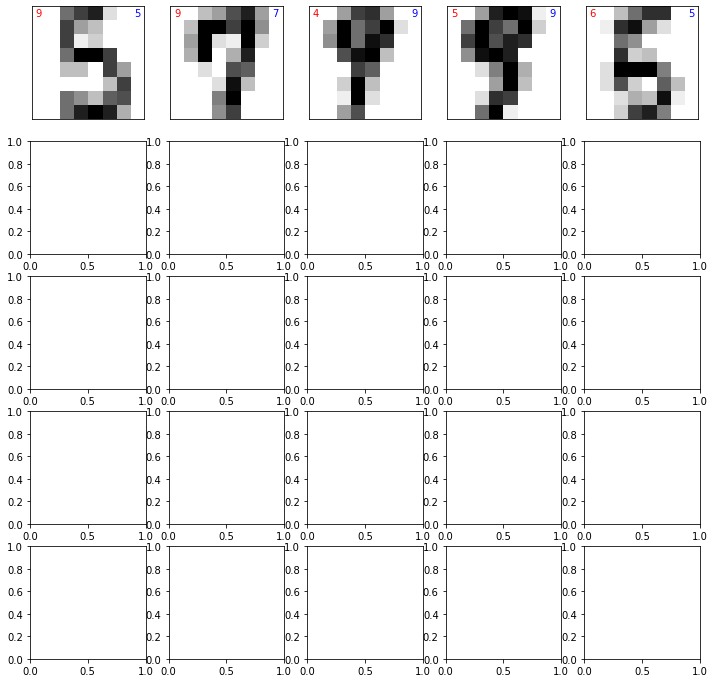

In [ ]:
mostar_resultados(digits,KNeighborsClassifier(),nx=5, ny=5,label = "incorrectos")

### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

Nos encontramos con la dificultad de elegir entre rapidez y eficiencia. Es aquí donde el análisis de las metricas es importate, para saber qué modelo es el que mejor se ajusta a los datos. A pesar de esto todos los modelos se ajustaron de buena forma, por lo cual podemos decir que son modelos eficientes.


## II.- California Housing Prices


<img src="https://www.wartsila.com/images/default-source/default-album/california_housing.tmb-1920x690.jpg?sfvrsn=126bc44_1" width="480" height="240" align="center"/>

Los datos se refieren a las casas encontradas en un distrito determinado de California y algunas estadísticas resumidas sobre ellas basadas en los datos del censo de 1990. Tenga en cuenta que los datos no se limpian, por lo que se requieren algunos pasos de procesamiento previo.

Las columnas son las siguientes, sus nombres se explican por sí mismos:

* longitude
* latitude
* housingmedianage
* total_rooms
* total_bedrooms
* population
* households
* median_income
* medianhousevalue
* ocean_proximity


El objetivo es poder predecir el valor promedio de cada propiedad. 
Para poder completar correctamente este laboratorio, es necesario seguir la siguiente rúbrica de trabajo:

1. Definición del problema
2. Estadística descriptiva
3. Visualización descriptiva
4. Preprocesamiento
5. Selección de modelo 
    1. Por lo menos debe comparar cuatro modelos
    2. Al menos tres de estos modelos tienen que tener hiperparámetros.
    3. Realizar optimización de hiperparámetros.
6. Métricas y análisis de resultados
7. Visualizaciones del modelo
8. Conclusiones

> **Observación**: Puede tomar como referencia lo realizado en la sección **I.- Clasificación de dígitos**. El alumno tiene la libertad de desarrollar un análisis más completo del problema (si así lo desea). Puede tomar como referencia el siguiente [link](https://www.kaggle.com/camnugent/california-housing-prices).

In [ ]:
import seaborn as sns 

import warnings
warnings.simplefilter("ignore")

In [ ]:
# read data
housing = pd.read_csv('data/housing.csv',sep=',')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


***1.Definición del problema.***

In [ ]:
housing.shape

(20640, 10)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
housing_elimin=housing[housing.isnull().any(axis=1)]
housing_elimin

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [ ]:
reqd_Index = housing_elimin.index.tolist()
print(reqd_Index)

[290, 341, 538, 563, 696, 738, 1097, 1350, 1456, 1493, 1606, 2028, 2115, 2301, 2323, 2334, 2351, 2412, 2420, 2578, 2608, 2647, 2826, 3024, 3328, 3354, 3376, 3482, 3485, 3529, 3721, 3778, 3912, 3921, 3958, 4043, 4046, 4186, 4279, 4309, 4391, 4447, 4496, 4591, 4600, 4629, 4667, 4691, 4738, 4743, 4744, 4767, 4852, 5059, 5216, 5222, 5236, 5654, 5665, 5678, 5723, 5751, 5990, 6052, 6068, 6220, 6241, 6253, 6298, 6421, 6541, 6590, 6814, 6835, 6962, 7097, 7113, 7168, 7191, 7228, 7316, 7330, 7547, 7654, 7668, 7763, 7806, 8337, 8383, 8530, 8915, 9149, 9571, 9620, 9622, 9814, 9845, 9877, 9942, 9970, 10033, 10216, 10236, 10385, 10389, 10428, 10495, 10761, 10885, 10915, 11096, 11311, 11351, 11441, 11449, 11512, 11741, 12101, 12414, 12570, 12809, 13015, 13069, 13311, 13332, 13336, 13597, 13656, 13706, 13925, 13932, 13933, 14015, 14152, 14173, 14307, 14331, 14386, 14462, 14521, 14641, 14930, 14970, 14986, 15030, 15060, 15118, 15137, 15397, 15479, 15607, 15663, 15890, 15975, 16025, 16038, 16104, 16105,

In [ ]:
housing_nuevo=housing.drop(reqd_Index,axis=0).drop(['ocean_proximity'], axis=1)
housing_nuevo

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [ ]:
housing_nuevo.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

***2.Estadistica desciptiva:***

In [ ]:
housing_nuevo.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
housing_nuevo.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


***3.Visualización descriptiva:***

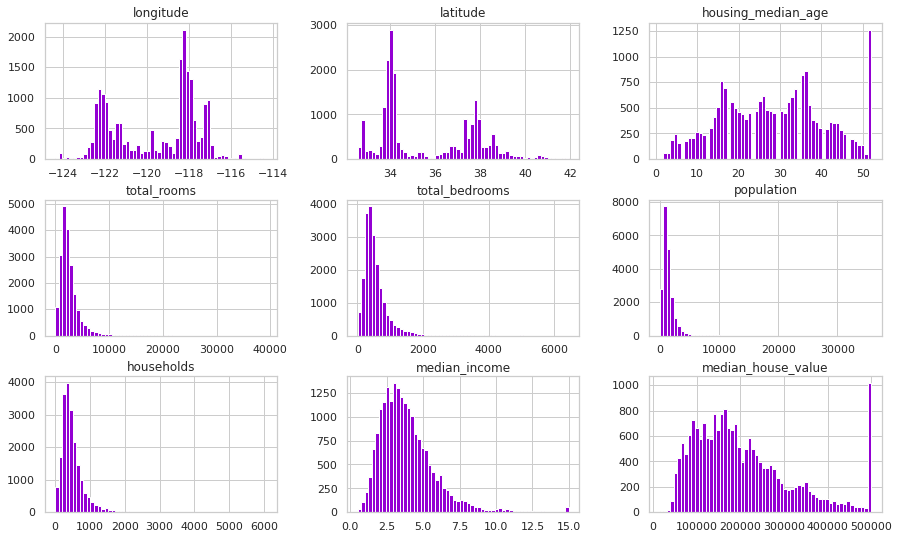

In [ ]:
housing_nuevo.hist(bins=60, figsize=(15,9),color='darkviolet');plt.show()

In [ ]:
''' Function to plot correlation of features '''
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(6,6))
    mask = np.zeros_like(corr_mat,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0, 
                cmap='plasma',square=False,lw=2,annot=True,cbar=False);plt.show()

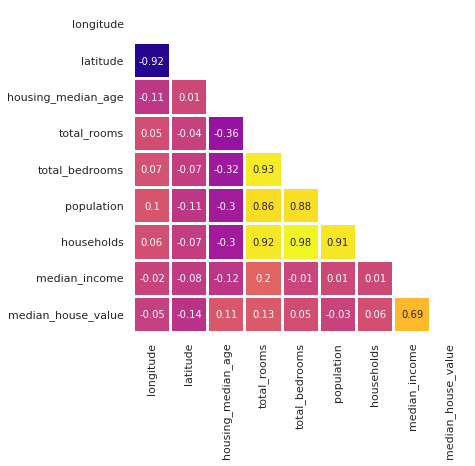

In [ ]:
corrMat(housing_nuevo,id=False) # plot masked numpy correlation matrix

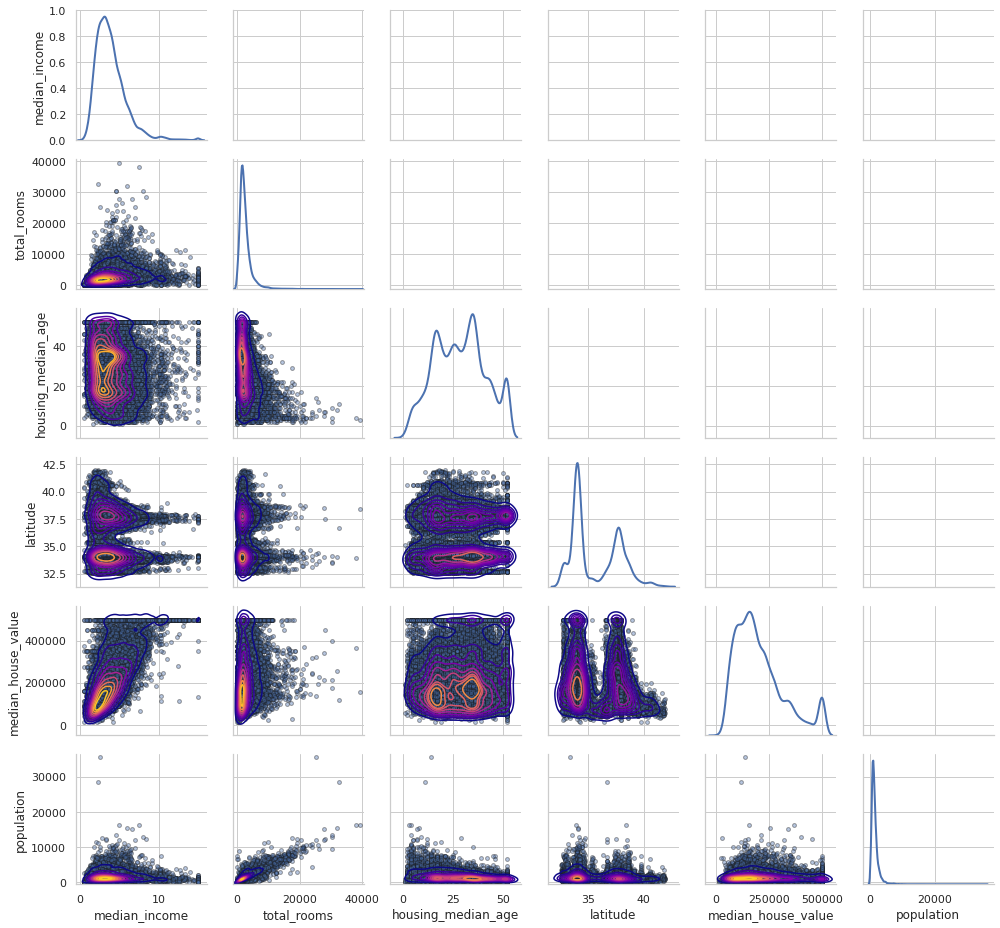

In [ ]:
''' Draw a Bivariate Seaborn Pairgrid /w KDE density w/ '''
def snsPairGrid(df):

    ''' Plots a Seaborn Pairgrid w/ KDE & scatter plot of df features'''
    g = sns.PairGrid(df,diag_sharey=False)
    g.fig.set_size_inches(14,13)
    g.map_diag(sns.kdeplot, lw=2) # draw kde approximation on the diagonal
    g.map_lower(sns.scatterplot,s=15,edgecolor="k",linewidth=1,alpha=0.4) # scattered plot on lower half
    g.map_lower(sns.kdeplot,cmap='plasma',n_levels=10) # kde approximation on lower half
    plt.tight_layout()
# Seaborn get a little slow, let's plot some interesting features
tlist = ['median_income','total_rooms','housing_median_age','latitude','median_house_value','population']
snsPairGrid(housing_nuevo[tlist]) 

***4.Procesamiento:***

In [ ]:
X = housing_nuevo.drop(columns="median_house_value").values
y = housing_nuevo["median_house_value"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))


Separando informacion:

numero de filas data original :  20433
numero de filas train set     :  15324
numero de filas test set      :  5109


***5.Selección de modelo:***

**Regresión Logística:**

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import time

#Selección de hiperparámetros
h_parametros_rlog= {
          'fit_intercept':[True],
          'penalty' : ['l1', 'l2'],
          'C' : [20, 10 , 1, 0.1, 0.01],
          'class_weight' : ['balanced', None],
          'solver' : ['liblinear'],
          }

rlog = LogisticRegression()
rlog_grid = GridSearchCV(estimator = rlog, param_grid = h_parametros_rlog, cv = 10)
start = time.time()
rlog_grid_result = rlog_grid
print("segundos:",(time.time() - start))

segundos: 9.274482727050781e-05


**K-nearest neighbour**

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from metrics_classification import summary_metrics

import time
h_parametros_kn={
          'n_neighbors' : [30, 25, 1, 9],
          'weights' : ['uniform', 'distance'],
          'metric' : ['euclidean', 'manhattan'],
          'algorithm' : ['auto','ball_tree', 'kd_tree']
          }
kn= KNeighborsClassifier()
kn_grid = GridSearchCV(estimator =kn, param_grid = h_parametros_kn, cv = 10)
start = time.time()
kn_grid_result = kn_grid.fit(X_train, y_train)
print("segundos",(time.time() - start))

segundos 21.11747097969055


In [74]:
kn_grid_result.best_score_

0.9859093421779989

In [76]:
kn_grid_result.best_params_

{'algorithm': 'auto',
 'metric': 'euclidean',
 'n_neighbors': 1,
 'weights': 'uniform'}

**Linear Discriminant Analysis**

In [78]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
import time

lda = LinearDiscriminantAnalysis(solver='svd', )#Calculamos el LDA con la matriz SVD
h_parametros_lda = {
    'n_components': (0,1,9),
    'store_covariance' :(True, False),
                   }
# Usando GridSearch obtenermos el mejor estimador posible
lda_grid = GridSearchCV(
    estimator = lda,
    param_grid = h_parametros_lda,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

start = time.time()
lda_grid_result = lda_grid
print("segundos",(time.time() - start))

segundos 7.367134094238281e-05
